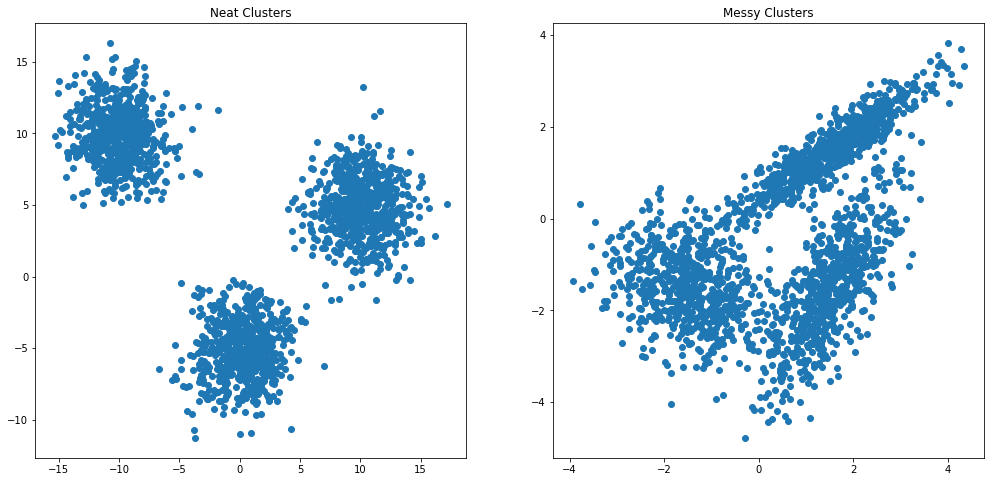

In [1]:
#import tools
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
import scipy as sp
%matplotlib inline

#Toy data sets

#neat spherical clusters
centers_neat = [(-10, 10), (0, -5), (10, 5)]
x_neat, _ = datasets.make_blobs(n_samples=2000,
                                centers=centers_neat,
                                cluster_std=2,
                                random_state=2)

#messy spherical clusters
x_messy, _ = datasets.make_classification(n_samples=2000,
                                          n_features=10,
                                          n_classes=3,
                                          n_clusters_per_class=1,
                                          class_sep=1.5,
                                          shuffle=False,
                                          random_state=301)


plt.figure(figsize=(17,8))
plt.subplot(121, title='Neat Clusters')
plt.scatter(x_neat[:,0], x_neat[:,1])
plt.subplot(122, title='Messy Clusters')
plt.scatter(x_messy[:,0], x_messy[:,1])

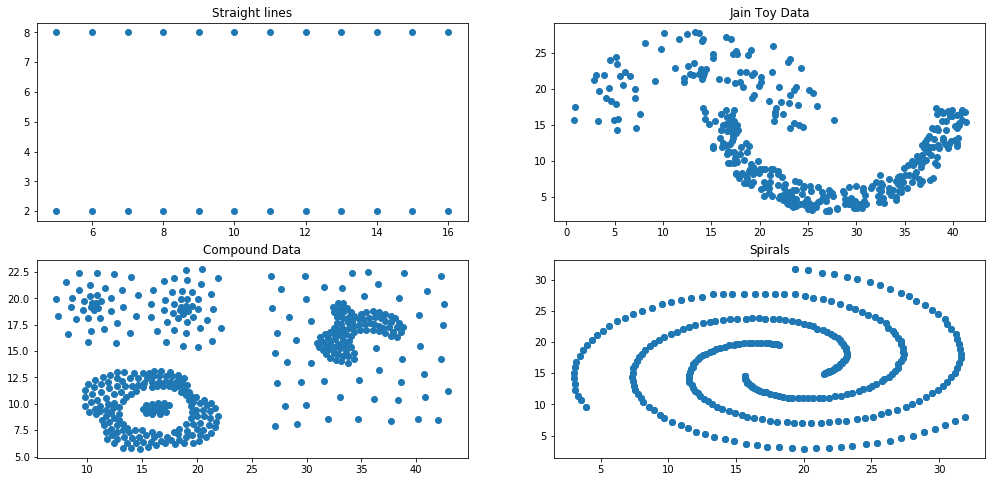

In [2]:
#load in straight lines data
lines_df = pd.read_csv('straight_lines.csv')
lines_x=lines_df.iloc[:,0]
lines_y=lines_df.iloc[:,1]
lines=np.column_stack((lines_x,lines_y))

#load in Jain's swirly data
jain_df = pd.read_csv('jains_toy.csv')
jain_x=jain_df.iloc[:,0]
jain_y=jain_df.iloc[:,1]
jain=np.column_stack((jain_x,jain_y))

#load in Zahn's compound data
compound_df = pd.read_csv('compound.csv')
compound_x=compound_df.iloc[:,0]
compound_y=compound_df.iloc[:,1]
compound=np.column_stack((compound_x,compound_y))

#load in spirals
spiral_df = pd.read_csv('spirals.csv')
spiral_x=spiral_df.iloc[:,0]
spiral_y=spiral_df.iloc[:,1]
spiral=np.column_stack((spiral_x,spiral_y))



#plot
plt.figure(figsize=(17,8))
plt.subplot(221, title='Straight lines')
plt.scatter(lines[:,0], lines[:,1])
plt.subplot(222, title='Jain Toy Data')
plt.scatter(jain[:,0], jain[:,1])
plt.subplot(223, title='Compound Data')
plt.scatter(compound[:,0], compound[:,1])
plt.subplot(224, title='Spirals')
plt.scatter(spiral[:,0], spiral[:,1])

In [3]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as AC


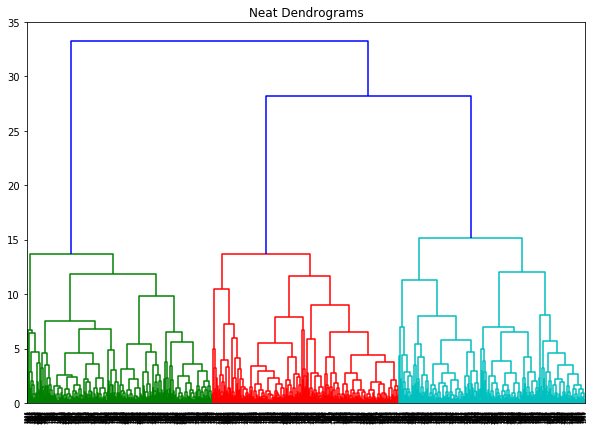

In [4]:
plt.figure(figsize=(10,7))
plt.title("Neat Dendrograms")
dend = sch.dendrogram(sch.linkage(x_neat,method='complete')) #try with different linkage methods


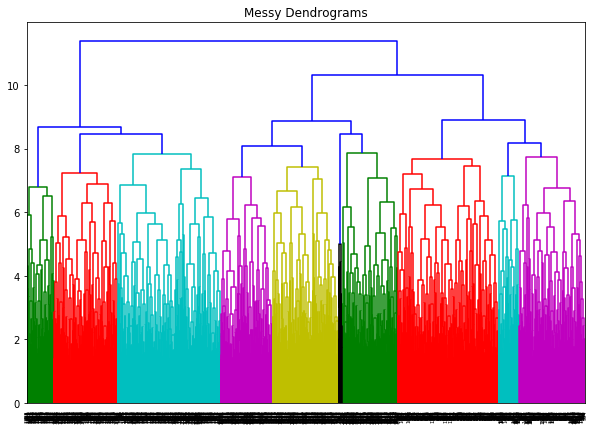

In [5]:
plt.figure(figsize=(10,7))
plt.title("Messy Dendrograms")
dend = sch.dendrogram(sch.linkage(x_messy,method='complete')) #try with different linkage methods

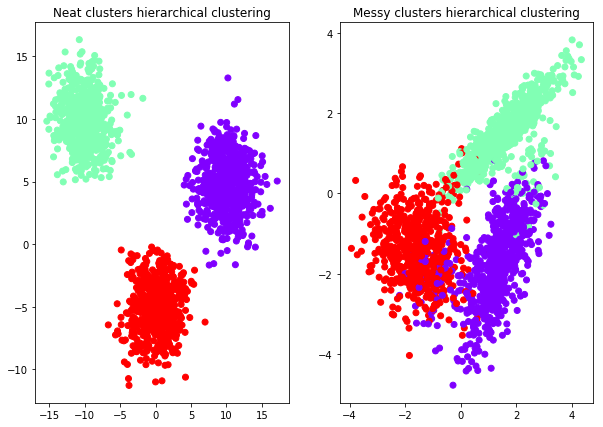

In [6]:
neat_cluster = AC(n_clusters=3,affinity='euclidean',linkage='complete') #try with different affinities ie euclidean, cosine, manhattan
neat_cluster.fit_predict(x_neat) 
#can change affinity to cosine and it will divide red blob down middle
messy_cluster = AC(n_clusters=3,affinity='euclidean',linkage='complete') #try with different linkage metrics ie single, complete, average, ward
messy_cluster.fit_predict(x_messy) 

plt.figure(figsize=(10,7))
plt.subplot(121,title='Neat clusters hierarchical clustering')
plt.scatter(x_neat[:,0],x_neat[:,1],c=neat_cluster.labels_,cmap='rainbow')
plt.subplot(122,title='Messy clusters hierarchical clustering')
plt.scatter(x_messy[:,0],x_messy[:,1],c=messy_cluster.labels_,cmap='rainbow')

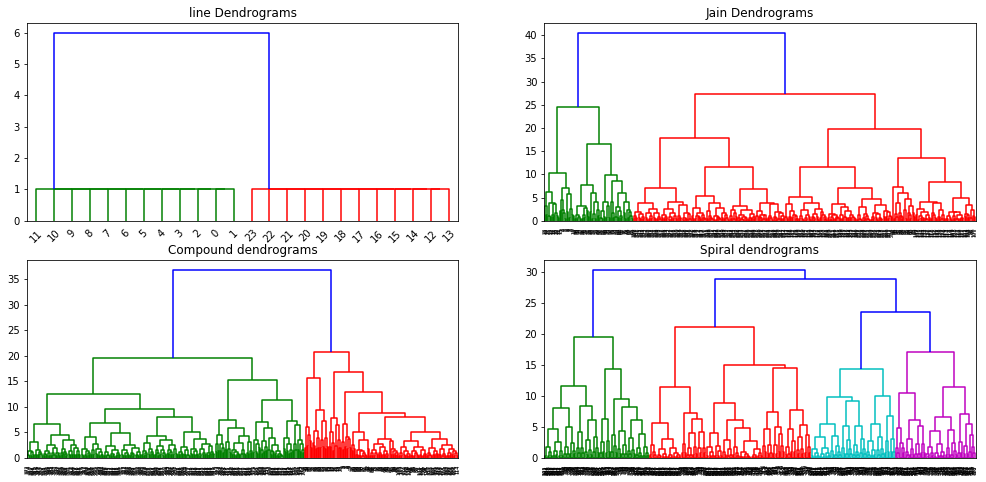

In [7]:
plt.figure(figsize=(17,8))
plt.subplot(221,title="line Dendrograms")
dend = sch.dendrogram(sch.linkage(lines,method='single')) #why do I prefer single here?
plt.subplot(222,title='Jain Dendrograms')
dend = sch.dendrogram(sch.linkage(jain,method='complete'))
plt.subplot(223,title='Compound dendrograms')
dend = sch.dendrogram(sch.linkage(compound,method='complete'))
plt.subplot(224,title='Spiral dendrograms')
dend = sch.dendrogram(sch.linkage(spiral,method='complete')) #how many clusters do we expect here??

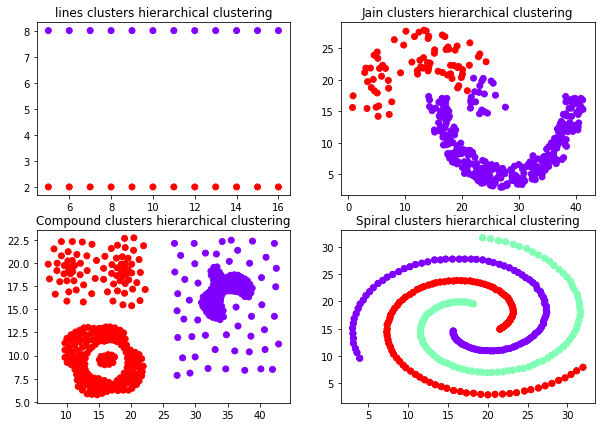

In [8]:
lines_cluster = AC(n_clusters=2,affinity='euclidean',linkage='single') 
lines_cluster.fit_predict(lines) 

jain_cluster = AC(n_clusters=2,affinity='euclidean',linkage='complete') 
jain_cluster.fit_predict(jain)

compound_cluster = AC(n_clusters=2,affinity='euclidean',linkage='complete') 
compound_cluster.fit_predict(compound) 

spiral_cluster = AC(n_clusters=3,affinity='euclidean',linkage='single') 
spiral_cluster.fit_predict(spiral)



plt.figure(figsize=(10,7))
plt.subplot(221,title='lines clusters hierarchical clustering')
plt.scatter(lines[:,0],lines[:,1],c=lines_cluster.labels_,cmap='rainbow')
plt.subplot(222,title='Jain clusters hierarchical clustering')
plt.scatter(jain[:,0],jain[:,1],c=jain_cluster.labels_,cmap='rainbow')
plt.subplot(223,title='Compound clusters hierarchical clustering')
plt.scatter(compound[:,0],compound[:,1],c=compound_cluster.labels_,cmap='rainbow')
plt.subplot(224,title='Spiral clusters hierarchical clustering')
plt.scatter(spiral[:,0],spiral[:,1],c=spiral_cluster.labels_,cmap='rainbow')